# Inferential Statistics - Simple Linear Regression
This notebook explores various implementations of *statistical inferences* of a **simple linear regression model. **

As the derivations of the model and the associated statistics have been covered in numerous books, lectures and notebooks (see sources) we will focus instead on a case study and its Python implementation using three main libraries.

This notebook is divided into four main sections: 

1. Introduction: notation, model description, formula, hypothesis
2. Implementation using Numpy and Pandas
3. Implementation using Statsmodel
4. Implementation using Scikit Learn


# 1. Introduction

### Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline
from IPython.core.display import HTML
sns.set() #Making seaborn the default styling 

### Dataset
The dataset illustrates the well known problem of trying to predict appartment prices given data on their surface. 
- The explanatory (or independent, exogeneous) variable $x$ is the appartment surface area in $m^2$
- The dependent (or endogeneous) variable $y$ is the appartment price in French Francs  

In [3]:
x = np.array([28,50,106,196,55,190,110,60,48,35,86,65,32,52,40,260,70,117,90,30,105,52,80,60,140,20,100,28])
y = np.array([650,1400,3250,4000,1340,3950,2500,1600,1250,1250,1750,1500,775,1225,1000,7500,1625,4750,
              1890,390,1875,1000,1350,1475,4950,425,2475,425])

### Notation
The following notation convention will be used throughout:
- $x_i$ is an observation of the explanatory variable
- $y_i$ is an observation of the dependent variable
- $\bar y$ and $\bar x$ are the mean of a set of observations
- $\hat y_i$ is the value predicted by the model, given the observation $x_i$

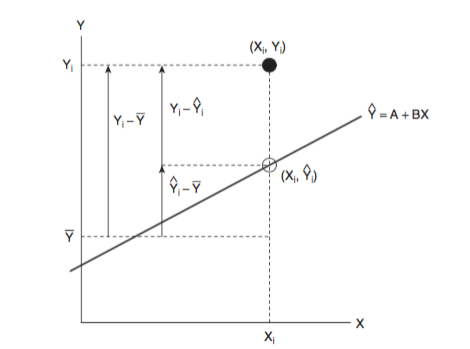

In [4]:
Image("/Users/User/Desktop/Data/Learning_Notebooks/images/Linear_Reg_Diagram.png")

### Decomposition of the sum of squares and notation
$SS_{Total} =  SS_{Residual} + SS_{Explained}$
- $SS_{Total} = \large \sum_{i-1}^n(y_i - \bar y)^2$        also noted $\large S_{yy}$
- $SS_{Residual} = \large \sum_{i-1}^n(y_i - \hat y_i)^2$        also noted $\large \sum e_i^2$
- $SS_{Expl} = \large \sum_{i-1}^n(\hat y_i - \bar y)^2$        also noted $\large S_{\hat y \hat y}$


### Simple linear regression
Given the observations, we fit a model with coefficients of regression $a$ and $b$ such that: 

$y_i = a + b x_i + e_i$

$\hat y_i = a + bx_i$

$e_i = y_i - \hat y_i$

### Coefficient of determination $R^2$

$R^2 = \large \frac{SS_{exp}}{SS_{tot}} = \frac{S_{\hat y \hat y}}{S_{yy}} = \Large \frac{\sum_{i-1}^n(\hat y_i - \bar y)^2}{\sum_{i-1}^n(y_i - \bar y)^2}$

### Leverage
The leverage of an observcation $x_i$ can be viewed intuitively as a measure of the "influence" of the point on the regression model. It is defined as:

$h_i = \Large \frac{1}{n} + \frac{(x_i - \bar x)^2}{\sum(x_i - \bar x)^2}$

Leverage values are bounded between $1/n$ and $1$. The average is $2/n$ and we can consider that the leverage is significant if it is greater than $4/n$


-------

## Maximum Likelihood Model - Normally distributed errors
### Model description
Given a sample of size $n$: $\{(Y_i, x_i)\}$ for $i = 1..n$ taken from a population described by the following model: 

$Y_i = Y \ | \ x_i = \alpha + \beta x_i + \epsilon_i$

Where:
- $\alpha$ is an unknown constant describing the y intercept of the regression line (called constant term)
- $\beta$ is an unknown constant describing the slope of the regression line (called coefficient of regression)
- $x_i$ is the value of the explanatory variable
- $\epsilon_i$ is a random variable which follows a Normal distribution $\epsilon_i \ i.i.d. \ \sim N(0, \sigma^2)$
- $Y_i$ is a random variable which also follows a Normal distribution $Y_i \ i.i.d. \ \sim N(\alpha + \beta x_i, \sigma^2)$


### Assumptions
- $E(\epsilon_i) = 0 \ \forall \ i$  Expectation of the random variable $\epsilon_i$ is zero
- $var(\epsilon_i) = \sigma^2 \ \forall \ i$ Variance of the random variable $\epsilon_i$ is finite and defined
- $\epsilon_i$ are i.i.d. (independent, identically distributed) $\Rightarrow \forall \ i \neq j \ cov(\epsilon_i,\epsilon_j) = 0$
- $\epsilon_i$ are normally distributed: $\epsilon_i \ i.i.d. \ \sim N(0, \sigma^2)$
- $x_i$ are observed with no error


### Estimators
Since $\alpha$, $\beta$ and $\sigma^2$ are unknown population parameters, we will estimate them using:
- B the estimator of $\beta$ with realization $b$ in a given sample
- A the estimator of $\alpha$ with realization $a$ in a given sample
- $S^2_{n-2}$ the estimator of $\sigma^2$ with realization $\hat \sigma^2$ in a given sample

### Espectation and variance of the model
- $E(Y_i) = E(Y \ | \ x_i) = \alpha + \beta x_i$ 
- $Var(Y_i) = Var(Y \ | \ x_i) = \sigma^2$ 

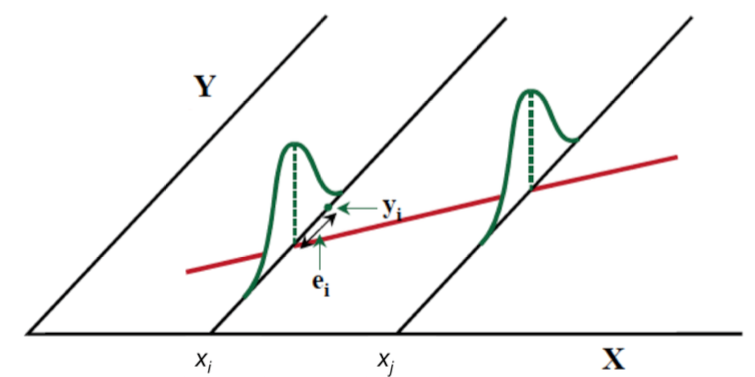

In [4]:
Image("/Users/User/Desktop/Data/Learning_Notebooks/images/Linear_Reg_Diagram2.png")

### Maximum Likelihood Estimators 
Maximizing the likelihood function and solving the equations gives:
- $\large A = \bar y - B \bar x$
- $B = \large  \frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum (x_i - \bar x)^2}=\frac{\sum y_i x_i - n \bar y \bar x}{\sum x_i^2 - n \bar x^2} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}=\frac{S_{xy}}{S_{xx}}$

### Properties of the estimators: 
- Expectation: $E(A) = \alpha$ and $E(B) = \beta$
- Variance: $ Var(A) = \sigma^2 \large \left(\frac{1}{n} + \frac{\bar x^2}{\sum (x_i -\bar x)^2} \right)$ and $Var(B) = \large \frac{\sigma^2}{\sum (x_i - \bar x)^2}$

### Distribution of the estimators
Since A and B are linear combinations of i.i.d. normal random variables $Y_1, Y_2,...,Y_n$ they also follow a normal distribution:
- $A \sim N\left( \alpha, \sigma^2 \large \left(\frac{1}{n} + \frac{\bar x^2}{\sum (x_i -\bar x)^2} \right) \right)$ and $B \sim N \left(\beta, \large \frac{\sigma^2}{\sum (x_i - \bar x)^2} \right)$ 

It can be shown that the estimator for the variance of the errors is unbiased:
- $ S^2_{n-2} = \large \frac{1}{n-2} \sum(Y_i - A -B x_i)^2 = \frac{1}{n-2} \sum e_i^2$

---------------

### Implications of the normal distribution hypothesis
**Estimators can be Z standardized:**

$\large \frac{A - E(A)}{\sqrt{Var(A)}} = \frac{A - \alpha}{\sqrt{\sigma^2 \large \left(\frac{1}{n} + \frac{\bar x^2}{\sum (x_i -\bar x)^2} \right)}} \small \sim N(0,1)$

$\large \frac{B - E(B)}{\sqrt{Var(B)}} = \frac{B - \beta}{\sqrt{\frac{\sigma^2}{\sum (x_i - \bar x)^2} }} \small \sim N(0,1)$


**Replacing the true variance $\sigma^2$ with its estimator $S^2_{n-2}$ leads to a student $T$ distribution with $n-2$ degrees of freedom:**

$\large \frac{A - \alpha}{S_A} \sim T_{n-2}$

$\large \frac{B - \beta}{S_B} \sim T_{n-2}$

Since A and B are independent of $S^2_{n-2}$

**Under the assumption that $\beta = 0$ then the following statistics follow a Chi-squared distribution:**

$\large \frac{\sum (\hat Y - \bar Y)^2}{\sigma^2} = \frac{SS_{exp}}{\sigma^2} \sim \chi_1^2$ and $\large \frac{\sum (Y_i - \bar Y)^2}{\sigma^2} =\frac{SS_{tot}}{\sigma^2} \sim \chi_{n-1}^2$ 

**Also, the following follows a Chi-squared sitribution:**

$\large \frac{\sum (Y_i - \bar Y_i)^2}{\sigma^2} = \frac{SS_{res}}{\sigma^2} \sim \chi^2_{n-2}$

**And hence the ratio of the two follows a Fisher distribution** 

$\large F = \frac{SS_{exp}}{SS_{res} / (n-2)} \sim F_{1,n-2}$

### Hypothesis testing for the parameters $\alpha$ and $\beta$

- $H_0 :\alpha = 0 $ 
- $H_1: \alpha \neq 0$

Test statistic: $T_A = \frac{A}{S_A} \sim T_{n-2}$


- $H_0 :\beta = 0 $ 
- $H_1: \beta \neq 0$ 

Test statistic: $T_B = \frac{B}{S_B} \sim T_{n-2}$

### Hypothesis testing for the statistical significance of the model as a whole
- $H_0 : Y_i = \alpha + \epsilon_i $
- $H_1 : Y_i = \alpha + \beta x_i \epsilon_i $

Test statistic: $\large F = \frac{SS_{exp}}{SS_{res} / (n-2)} \sim F_{1,n-2}$


------------------
## Confidence intervals
### Confidence interval around the mean of the regression line 
For a given observation $x_0$ we want to construct a C.I. for $E(Y_0) = E(Y | x = x_0) = \alpha + \beta x_0$
- Expectation: $E[Y \ | \ x = x_0] = E(A) + E(B) x_0 = \alpha + \beta x_0$
- Variance: $\text{Var}[Y \ | \ x = x_0] = \sigma^2 \large  \left( \frac{1}{n} + \frac{(x_0 - \bar x)^2 }{\sum_{i=1}^n (x_i - \bar x)^2} \right) = \small \sigma^2 h_0$ where $h_0$ is the leverage of point $x_0$. 

Since $A + B x_0$ is a linear combination of Normal r.v. it also has a Normal distribution: 

$A + B x_0 \sim N \left( \alpha + \beta x_0, \sigma^2 h_0 \right)$ and so $\large \frac{A + Bx_0 - (\alpha + \beta x_0)}{ \sigma \sqrt{h_0} } \small \sim N(0,1)$

Since $\sigma^2$ is unknown, we replace it by its estimator $S^2_{n-2}$ to obtain a pivotal quantity: 

$\large \frac{A + Bx_0 - (\alpha + \beta x_0)}{ S_{n-2} \sqrt{h_0} } \small \sim T_{n-2}$

Re-arranging to build a confidence interval of level $1 - \gamma$ : 

$IC_{1 - \gamma} [E(Y \ | \ x_0)] = [ A + B x_0 \pm t_{(n-2)(1 - \gamma /2)} S_{n-2} \sqrt{h_0} ]$

### Prediction Confidence Interval around a new observation $x_p$

Here we are interested in the Expectation and Variance of the residue for a new observation (i.e. one which was not included in the model previously)

- Expectation of $E(Y_p - (A + B x_p)) = E(Y_p) - E(A + B x_p) = 0$
- Variance: $\text{Var}(Y_p - (A + B x_p)) = \text{Var}(Y_p) + \text{Var}(A + B x_p) = \sigma^2 \left(1 + h_p \right)$ Note here that the variance is greater than the variance in the previous C.I.

As previously, replacing the variance with $S_{n-2}^2$ and constructing the pivotal quantity:

$\large \frac{Y_p - (A + B x_p)}{S_{n-2} \sqrt{1 + h_p}} \sim T_{n-2}$

And the prediction confidence interval: 

$IC_{1 - \gamma} [E(Y \ | \ x_p)] = [ A + B x_p \pm t_{(n-2)(1 - \gamma /2)} S_{n-2} \sqrt{1 + h_p} ]$

*The uncertainty around the prediction interval is greater*

------------

## Some comments on the residues
If the hypotheses of the model are not violated (i.e. residues are normally distributed etc..) then the following properties hold:
- Residues are not independent: their sum is null
- The variance of the residues is $\text{Var}(Y_i - (A + B x_i)) = \text{Var}(Y_i) + \text{Var}(A + Bx_i) - 2\text{Cov}(Y_i - (A + B x_i)) = \sigma^2 + \sigma^2 h_i - 2\sigma^2 h_i = \sigma^2(1 - h_i)$
- The variance can be estimated as $S^2_{n-2}(1 - h_i)$

Note: do not confuse the variance of the residues of the sample $\sigma^2(1 - h_i)$ with the variance of the residue of a new observation $x_p$ : $\sigma^2(1 + h_p)$

### Cook's distance: a measure of influence
Defined as $D_i = \Large \frac{(e_i)^2}{2 \sigma^2} \left( \frac{h_i}{(1- h_i)^2} \right)$

Values larger than 1, 4 / n or 4 / (n - P -1) for multiple linear regression are considered to be large and point towards an influential observation

-------------

# 2. Implementation using Numpy  and Pandas
## 2.1 Custom Python class
*Note that Statsmodel is used for probability calculations*

In [5]:
class simple_linear_reg_model(object):
    '''Class used to bundle together the data, coefficients, parameters, and statistics 
    of the simple linear regression model '''
    
    def __init__(self,x,y):
        '''Initializing the dataset and the basic computed values:
        x,y : datasets
        n: number of observations 
        x_bar, y_bar: means of variables
        s_xx, s_yy, s_xy: short hand notation, e.g. s_xx = sum(x - x_bar)^2 
        '''
        self.x = x
        self.y = y
        self.n = len(x)
        self.x_bar = np.mean(self.x)
        self.y_bar = np.mean(self.y)
        self.s_xx = np.sum((self.x - self.x_bar)**2)
        self.s_yy = np.sum((self.y - self.y_bar)**2)
        self.s_xy = np.sum((self.x - self.x_bar) * (self.y - self.y_bar))
    
        #Other attributes are created here but initialized in the corresponding methods
        self.a, self.b = None, None
        self.y_hat, self.epsilon, self.h = None, None, None
        self.SS_tot, self.SS_res, self.SS_exp = None, None, None
        self.Sn_2, self.S_A, self.S_B = None, None, None
        self.R_squared = None
        self.F, self.T_A, self.T_B = None, None, None
        self.F_pvalue, self.T_A_pvalue, self.T_B_pvalue = None, None, None
        self.CI_reg_upp,self.CI_reg_low, self.CI_pred_upp,self.CI_pred_low = None,None,None,None
        self.S_epsilon, self.Cook_Distance = None, None
    
    def fitModel(self):
        #Fit the linear regression model to the data and compute the coefficients
        self.b = self.s_xy / self.s_xx
        self.a = self.y_bar - self.b * self.x_bar
        
        #Predicted values y_hat, residuals and leverage
        self.y_hat = self.a + self.b * self.x
        self.epsilon = self.y - self.y_hat
        self.h = (1 / self.n) + (x - self.x_bar)**2 / (self.s_xx)
        
        #Sum of squared
        self.SS_tot = np.sum( (self.y - self.y_bar)**2 )
        self.SS_res = np.sum( (self.y - self.y_hat)**2 )
        self.SS_exp = np.sum( (self.y_hat - self.y_bar)**2 )
        
        #Estimators of the variances
        self.Sn_2 = (1/(self.n - 2)) * self.SS_res
        self.S_A = self.Sn_2 * ( (1 / self.n) + self.x_bar**2 / self.s_xx )
        self.S_B = self.Sn_2 / self.s_xx
        
        #Coefficient of determination: R squared
        self.R_squared = self.SS_exp / self.SS_tot
        
        #Test statistics
        self.T_A = self.a / np.sqrt(self.S_A)
        self.T_B = self.b / np.sqrt(self.S_B)
        self.F = self.SS_exp / (self.SS_res / (self.n -2))
        
        #Confidence intervals around the given observations
        t = stats.t.ppf(.975,self.n - 2)
        self.CI_reg_upp = self.a + self.b * self.x + t * np.sqrt(self.Sn_2 * self.h)
        self.CI_reg_low = self.a + self.b * self.x - t * np.sqrt(self.Sn_2 * self.h)
        self.CI_pred_upp = self.a + self.b * self.x + t * np.sqrt(self.Sn_2 * (1 + self.h))
        self.CI_pred_low = self.a + self.b * self.x - t * np.sqrt(self.Sn_2 * (1 + self.h))
        
        #Variance of the residues and Cook's distance
        self.S_epsilon = self.Sn_2 * (1 - self.h)
        self.Cook_Distance = (self.epsilon**2 / (2*self.Sn_2) ) * (self.h / (1 - self.h)**2 )
        
    def pValues(self):
        #Compute the p-values associated with the test statistics, given that the null hypothesis
        #H_0: no linear relationship between x and y, i.e. coefficients are = 0 
        #Note that we use the statsmodel library here
        #Note - to be checked...
        self.T_A_pvalue = (1 - stats.t.cdf(abs(self.T_A), self.n -2) ) * 2
        self.T_B_pvalue = (1 - stats.t.cdf(abs(self.T_B), self.n -2) ) * 2
        self.F_pvalue = (1 - stats.f.cdf(self.F, 1, self.n -2 ) )
    
    def printResults(self):
        #Print results in a similar format to SAS output
        print('Parameter Estimates')
        df1 = pd.DataFrame(data = {'1. DF' : [1,1 ], '2. Parameter Estimate':[self.a,self.b], '3. Standard Error':[np.sqrt(self.S_A),np.sqrt(self.S_B)], 
                          '4. t Value': [self.T_A,self.T_B], '5. Pr > |t|': [self.T_A_pvalue, self.T_B_pvalue]}, index = ['Intercept (a)','SURFACE (b)'])
        
        display(df1.round(3))
        df2 = pd.DataFrame(data = {'1. DF' : [1,self.n -2 ,self.n -1], '2. Sum of Squares':[self.SS_exp,self.SS_res,self.SS_tot], '3. F_value':[self.F,'',''], 
                          '4. Pr > F': [self.F_pvalue,'','']}, index = ['Model (Explained)','Error (Residues)','Total'])
        print('Analysis of Variance')
        display(df2.round(3))
        
        df3 = pd.DataFrame(data = {'Values': [self.y_bar,self.R_squared]}, index = ['Dependent Mean (y_bar)','R-squared'])
        print('Mean and R-squared')
        display(df3.round(3))
        
        
        df4 = pd.DataFrame(data = {'1. Dependent Variable' : self.y, '2. Predicted Value': self.y_hat, '3. Residual': self.epsilon , 
                          '3. Std Error Residuals': np.sqrt(self.S_epsilon) ,'4. 95% CI Mean -': self.CI_reg_low, '5. 95% CI Mean +': self.CI_reg_upp, '6. 95% CI Pred -': self.CI_pred_low,
                          '7. 95% CI Pred +':self.CI_pred_upp, '8. Leverage (h)': self.h, '9. Cook Distance': self.Cook_Distance})
        print('Output statistics')
        display(df4.round(3))
        
        
        

## 2.2 Initialize the model, perform the fitting and probability calculations and print the results in SAS format 
Given the very small p-values for both the slope parameter $B$ and the model as a whole, we can confidently reject the null hypothesis and state that there is a statistically significant linear relationship between the explanatory variable $x$ and the dependent variable $y$

In [6]:
lm = simple_linear_reg_model(x,y)
lm.fitModel()
lm.pValues()
lm.printResults()

#Limiting max width of iPython column display
HTML("<style>.rendered_html th {max-width: 90px;}</style>") 

Parameter Estimates


,1. DF,2. Parameter Estimate,3. Standard Error,4. t Value,5. Pr > |t|
Intercept (a),1,-147.329,206.228,-0.714,0.481
SURFACE (b),1,26.766,2.070,12.931,0.000


Analysis of Variance


,1. DF,2. Sum of Squares,3. F_value,4. Pr > F
Model (Explained),1,6.318019e+07,167.21,7.8626e-13
Error (Residues),26,9.824080e+06,,
Total,27,7.300427e+07,,


Mean and R-squared


,Values
Dependent Mean (y_bar),2056.071
R-squared,0.865


Output statistics


,1. Dependent Variable,2. Predicted Value,3. Residual,3. Std Error Residuals,4. 95% CI Mean -,5. 95% CI Mean +,6. 95% CI Pred -,7. 95% CI Pred +,8. Leverage (h),9. Cook Distance
0,650,602.114,47.886,593.053,269.795,934.432,-704.379,1908.607,0.069,0.000
1,1400,1190.962,209.038,599.899,915.410,1466.514,-102.258,2484.182,0.048,0.003
2,3250,2689.848,560.152,601.625,2430.681,2949.014,1400.020,3979.676,0.042,0.019
3,4000,5098.771,-1098.771,555.866,4559.367,5638.176,3724.928,6472.615,0.182,0.435
4,1340,1324.791,15.209,600.963,1059.215,1590.367,33.660,2615.922,0.044,0.000
5,3950,4938.176,-988.176,560.961,4421.540,5454.813,3573.111,6303.242,0.167,0.311
6,2500,2796.911,-296.911,600.893,2530.667,3063.155,1505.642,4088.180,0.044,0.006
7,1600,1458.620,141.380,601.847,1201.643,1715.597,169.230,2748.010,0.041,0.001
8,1250,1137.430,112.570,599.423,857.534,1417.326,-156.722,2431.583,0.049,0.001
9,1250,789.475,460.525,595.618,477.136,1101.813,-512.080,2091.029,0.061,0.019


## 2.3 Print the resulting scatter plot and regression line  with confidence intervals

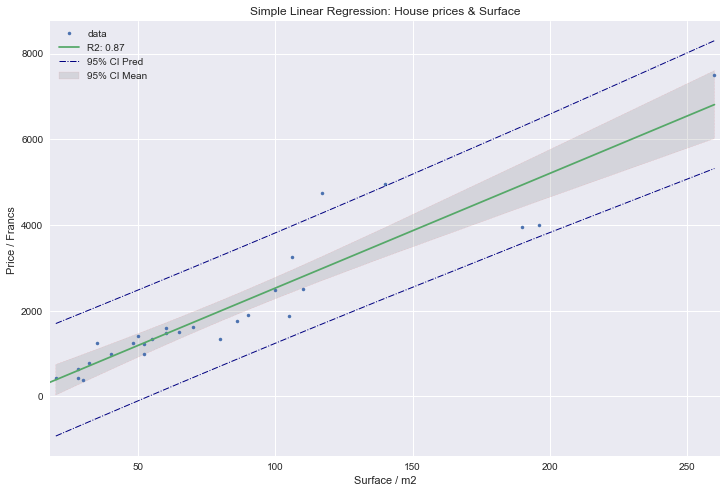

In [7]:
#Plot the x and y values in a scatter
plt.figure(figsize = (12,8))
plt.plot(lm.x, lm.y, marker = '.', linestyle = 'none', label = 'data')
plt.xlabel('Surface / m2')
plt.ylabel('Price / Francs ')
plt.title('Simple Linear Regression: House prices & Surface')

#Make regression line to plot
x_vals = np.array([0,max(lm.x)])
y_vals = lm.a + x_vals * lm.b
plt.plot(x_vals,y_vals, label = 'R2: %0.2f '%(lm.R_squared))

#Plot the Confidence Intervals
plt.fill_between(sorted(lm.x), sorted(lm.CI_reg_upp), sorted(lm.CI_reg_low), alpha = .2, facecolor='grey', linestyle='dashdot', edgecolor = 'red', label = '95% CI Mean'  )
plt.plot(sorted(lm.x), sorted(lm.CI_pred_upp), linewidth=1, linestyle='dashdot', color = 'navy')
plt.plot(sorted(lm.x), sorted(lm.CI_pred_low), linewidth=1, linestyle='dashdot', color = 'navy', label = '95% CI Pred')

plt.legend()
plt.xlim(min(lm.x) -2,max(lm.x) +2)
plt.show()

## 2.4 Study of the residues and influential points 
Studying the residues is fundamental as it allows to highlight observations which are
- Potential outliers 
- Play an important role in the regression analysis

Moreover, it allows us to confirm the hypothesis of the model, in particular:
- Linearity
- Homoscedasticity
- Normal distribution of the errors $\epsilon_i$

### Plotting the residue scatter plot and QQ plot
Comments: The residues appear to be approximately symetrically distributed, with mean close to zero. The distribution is not perfectly normal, in particular the right tail is heavier than normal.

This points towards a violation of the hypothesis of heteroscedasticity, i.e. the residue increases as a function of x. A potential solution would be to perform linear regression on $log(Y)$ instead

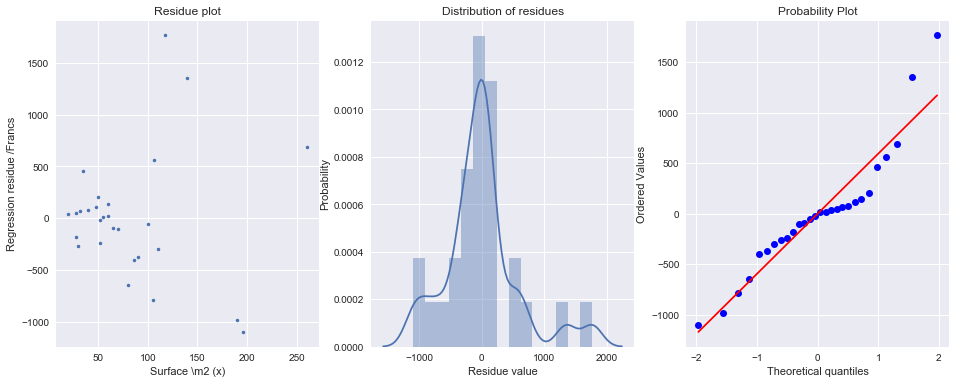

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))

#Figure 1: residue plot
ax1.plot(lm.x, lm.epsilon, marker = '.', linestyle = 'none')
ax1.set_xlabel('Surface \m2 (x)')
ax1.set_ylabel('Regression residue /Francs')
ax1.set_title('Residue plot')

#Figure 2: Plot of the distribution of the residues
ax2 = sns.distplot(lm.epsilon,ax = ax2, bins = 15)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residue value')
ax2.set_title('Distribution of residues')

#Figure 3: QQ plot comparing residue quantiles to theoretical normal quantiles
ax3 = stats.probplot(lm.epsilon, dist = "norm", plot = plt)
plt.show()

# 3. Implementation using Statsmodel library
The python statsmodel library offers extensive functionalities and reports for the linear regression model. We will explore the main ones in this section

- As recommended by Statsmodel, import the statsmodel api to access the functions and models. 
- Importing statsmodels.api will load most of the public parts of statsmodels. This makes most functions and classes conveniently available within one or two levels, without making the “sm” namespace too crowded.
- Use the add_constant utility function to add a column of 1s to the matrix of observation. This will allow the model to fit an intercept parameter
- Print results summary

http://www.statsmodels.org/dev/importpaths.html


In [9]:
import statsmodels.api as sm

#Adding the column of 1s
X = sm.add_constant(x) 

#Fit the model and print output
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 16 May 2018   Prob (F-statistic):           7.86e-13
Time:                        15:23:07   Log-Likelihood:                -218.48
No. Observations:                  28   AIC:                             441.0
Df Residuals:                      26   BIC:                             443.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3289    206.228     -0.714      0.4

### Comments
As expected, the values for the parameters, test statistics, probabilities, R-squared values etc.. are the same as those calculated manually using numpy. 

- The formatted table offers a more concise summary of the information
- Statsmodel also performs a number of tests by default: for example the Durbin Watson, Jarque Bera etc.. 

## 3.2 Study of influence
The Statsmodel result object has a built-in method which returns an Influence object with influence and outlier measures. This "influence" object contains many results, methods and methods which can be called as required. See below for a few interesting ones: 

- .cooks_distance - Cooks distance
- .hat_matrix_diag - The leverage for observation points
- .summary_table() - Prints the available influence results
- .summary_frame()  - Creates a DataFrame with all available influence results.


Documentation here:

http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.get_influence.html

http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence


In [10]:
#Creating the influence object from the OLS results
influence = results.get_influence()

#Cooks distance for the x observations
display(influence.cooks_distance[0].round(3))

#Leverage values for the x observations
display(influence.hat_matrix_diag.round(3))

array([0.   , 0.003, 0.019, 0.435, 0.   , 0.311, 0.006, 0.001, 0.001,
       0.019, 0.008, 0.   , 0.   , 0.   , 0.   , 0.671, 0.001, 0.225,
       0.007, 0.007, 0.037, 0.004, 0.021, 0.   , 0.206, 0.   , 0.   ,
       0.003])

array([0.069, 0.048, 0.042, 0.182, 0.044, 0.167, 0.044, 0.041, 0.049,
       0.061, 0.036, 0.039, 0.064, 0.046, 0.056, 0.394, 0.037, 0.049,
       0.036, 0.067, 0.042, 0.046, 0.036, 0.041, 0.073, 0.08 , 0.039,
       0.069])

In [11]:
influence.summary_frame()

,dfb_const,dfb_x1,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,0.021142,-0.015013,0.000242,0.021587,0.022012,0.069174,0.080745,0.079187
1,0.068917,-0.038195,0.003032,0.076533,0.077866,0.047560,0.348455,0.342489
2,0.038493,0.075650,0.019037,0.194606,0.195124,0.042072,0.931066,0.928597
3,0.487926,-0.890103,0.435397,-0.992666,-0.933163,0.182248,-1.976684,-2.102726
4,0.004632,-0.002335,0.000015,0.005335,0.005441,0.044179,0.025308,0.024816
5,0.389574,-0.731358,0.311481,-0.824732,-0.789279,0.167188,-1.761577,-1.840704
6,-0.014662,-0.046415,0.005672,-0.104935,-0.106510,0.044401,-0.494116,-0.486812
7,0.039698,-0.017702,0.001191,0.047899,0.048796,0.041364,0.234910,0.230593
8,0.038162,-0.021840,0.000910,0.041861,0.042661,0.049071,0.187797,0.184275
9,0.188495,-0.126142,0.019454,0.195684,0.197252,0.061106,0.773190,0.767044


## 3.3 Influence plots

Influence plots show the externally studentized residuals vs the leverage of each observation as measured by the hat matrix (here this is only the leverage as there are no matrices in simple linear regression)

Externally studentized residuals are residuals that are scaled by their standard deviation where: 

$var(\epsilon_i) = \sigma^2_i (1 - h_i)$

The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence

Source: http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html#Influence-plots

---------

### Leverage-Resid2 Plot
Closely related to the influence_plot is the leverage-resid2 plot.

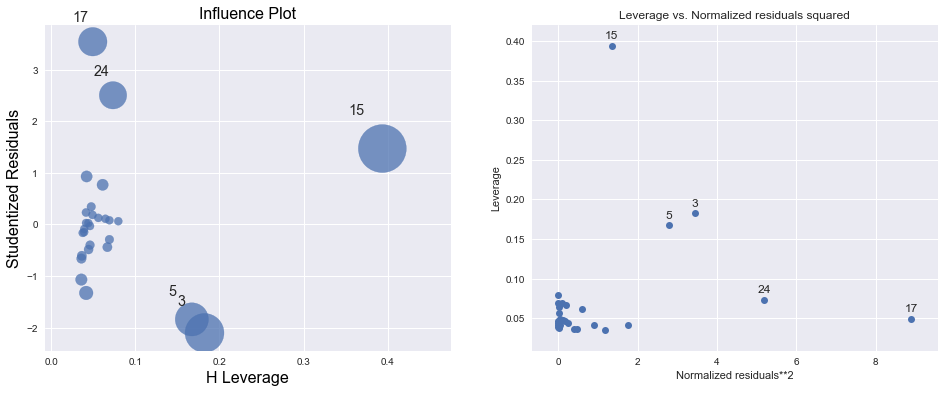

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))

ax1 = sm.graphics.influence_plot(results, ax=ax1, criterion="cooks")
ax2 = sm.graphics.plot_leverage_resid2(results, ax=ax2)

# 4. Implementation using Sklearn
There exists no R type regression summary report in sklearn. The main reason is that sklearn is used for predictive modelling / machine learning and the evaluation criteria are based on performance on previously unseen data (such as predictive r^2 for regression).

Nevertheless we can extract some key values and parameters using the built in methods and attributes, in particular the **regression metrics:** 

Documentation: http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Create linear regression object
regr = linear_model.LinearRegression()

#Reshaping the matrix of X
X = x.reshape(-1,1) 

# Train the model using the data sets
regr.fit(X, y)

# Make predictions using the same data set
y_pred = regr.predict(X)

#The coefficients
print('Intercept: \n', regr.intercept_)
print('Slope: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))

Intercept: 
 -147.32894603095656
Slope: 
 [26.765818]
Mean squared error: 350860.01
R2 score: 0.87


# Sources

Notebook Author: Xavier Bourret Sicotte

Date: May 2018

--------------

The dataset, formulas and insights were taken from the (excellent) course at CNAM in Paris: 

- Course name: STA102 - Analyse des données : méthodes explicatives  
- Prof: G. Russolillo
- [Link1][1] , [Link2][2]

Other usefull resources are: 
[Lecture 14][3] at Duke for detailed derivations of most formula

[1]: http://maths.cnam.fr/spip.php?article51
[2]: http://formation.cnam.fr/rechercher-par-discipline/analyse-des-donnees-methodes-explicatives-208822.kjsp
[3]: https://www2.stat.duke.edu/~hc95/Teaching/STA103/lec14_notes.pdf
